In [1]:
from __future__ import division
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re
# NLP tools
import nltk
import os

data_path = "~/DA/dataset/googleplaystore.csv"
pd_data = pd.read_csv(data_path)
pd_data #10841*13
#len(pd_data)=10841
pd_sort_by_installs = pd_data.sort_values(by=['Installs'], ascending = False)
#pd_sort_by_installs.head(100)
pd_sort_by_installs = pd_sort_by_installs[1:101]#因第一項資料有缺項 故不取
pd_sort_by_installs.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.1,282460,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device
3326,Gboard - the Google Keyboard,TOOLS,4.2,1859109,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
431,Viber Messenger,COMMUNICATION,4.3,11334973,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
4222,imo free video calls and chat,COMMUNICATION,4.3,4785892,11M,"500,000,000+",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
3235,Google Translate,TOOLS,4.4,5745093,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


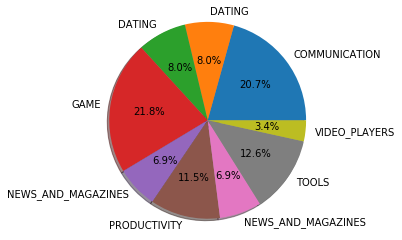

In [2]:
pd_category_count = pd_sort_by_installs.groupby(['Category']).size()
pd_category = []
count = []
#print(len(pd_category_count.values))
for i in pd_category_count:
    if(i>2):
        pd_category.append(pd_category_count[pd_category_count == i].index[0])
        count.append(i)
"""
df = pd.DataFrame({'category':pd_category, 'count':count})
ax1 = df.plot.bar(x='category', y='count', rot=1)
"""
plt.pie(count, labels=pd_category,
autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

In [3]:
#pd_update = pd_sort_by_installs.groupby(['Last Updated'])
'''
for i in pd_update:
    print(pd_update[pd_update == i].index[0])
'''
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
pd_month = []
for i in pd_sort_by_installs['Last Updated']:
    pd_month.append(i)
#pd_month
count = 0
month_count = np.zeros(12)
for i in range(100):
    if(re.search("2018", pd_month[i])):
        #print("yes")
        for j in month_lst:
            if(re.search(j, pd_month[i])):
               month_count[month_lst.index(j)]+=1
        pass
    else:
        count+=1
        #print("no")
#month_count

There's 7.0 App in Top 100 not update in 2018


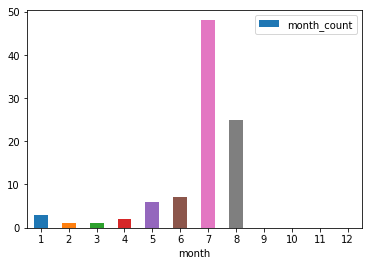

In [4]:
print("There's",100-np.sum(month_count),"App in Top 100 not update in 2018")
df = pd.DataFrame({'month':[1,2,3,4,5,6,7,8,9,10,11,12], 'month_count':month_count})
ax2 = df.plot.bar(x='month', y='month_count', rot=1)

There're  287 (out of 10841)Apps, which rating are less than 3


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


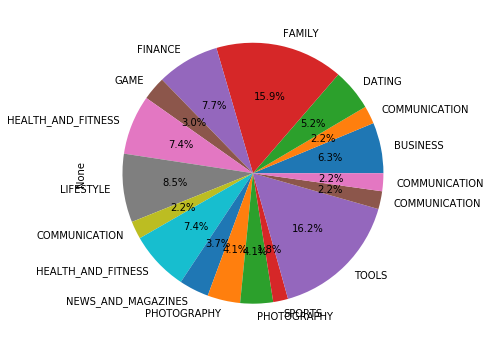

In [5]:
pd_worse = pd_data[pd_data["Rating"]<3]
print("There're ",len(pd_worse),"(out of 10841)Apps, which rating are less than 3")
pd_worse_category_count = pd_worse.groupby(['Category']).size()
pd_worse_category = []
w_count = []
for i in pd_worse_category_count:
    if(i>3):
        pd_worse_category.append(pd_worse_category_count[pd_worse_category_count == i].index[0])
        w_count.append(i)
"""
df = pd.DataFrame({'category':pd_category, 'count':count})
ax1 = df.plot.bar(x='category', y='count', rot=1)
"""
series = pd.Series(w_count, index=pd_worse_category)
series.plot.pie(figsize=(6, 6),autopct='%1.1f%%')
#pd_data.head(1)

In [8]:
earn = pd.DataFrame(pd_data,columns=['App','Category','Installs','Price'])
for i in range(len(earn)):
    #print(earn.loc[i]['Installs'])
    if(earn.loc[i]['Installs']!="Free"):#去除錯誤的資料
        earn.loc[i]['Installs'] =int(re.sub("[\s+\\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+".encode('utf-8').decode('utf-8'), "".encode('utf-8').decode('utf-8'),earn.loc[i]['Installs']))
        earn.loc[i]['Price'] =float(re.sub("[\s+\\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+".encode('utf-8').decode('utf-8'), "".encode('utf-8').decode('utf-8'),earn.loc[i]['Price']))
    else:
        earn.loc[i]['Installs'] = 0
        earn.loc[i]['Price'] = 0
#earn.loc[i]['Installs'] = int(re.)
earn = earn[earn['Price']!=0]
earn = earn.sort_values(by=['Price'], ascending = False)
earn

,App,Category,Installs,Price
4367,I'm Rich - Trump Edition,LIFESTYLE,10000,400
5359,I am rich(premium),FINANCE,5000,399.99
5373,I AM RICH PRO PLUS,FINANCE,1000,399.99
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,0,399.99
5354,I am Rich Plus,FAMILY,10000,399.99
5351,I am rich,LIFESTYLE,100000,399.99
5358,I am Rich!,FINANCE,1000,399.99
5362,I Am Rich Pro,FAMILY,5000,399.99
4362,💎 I'm rich,LIFESTYLE,10000,399.99
5364,I am rich (Most expensive app),FINANCE,1000,399.99


In [16]:
earn['Earn']=earn['Price']*earn['Installs']
earn = earn.sort_values(by=['Earn'], ascending = False)
earn_top = earn.head(100)
earn_top = earn_top.groupby(['Price']).size()
#len(earn_top)
earn_price = []
earn_count = []
for i in earn_top:
    earn_price.append(earn_top[earn_top == i].index[0])
    earn_count.append(i)
#print(earn_price)
#print(earn_count)


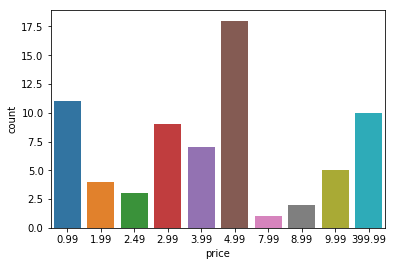

In [35]:
aaaa = pd.DataFrame({'price':earn_price, 'count':earn_count})
ax = sns.barplot(x='price', y='count',data=aaaa)